In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv("/Users/akshitagrawal/Desktop/datasets/autos.csv", encoding='ISO-8859-1')
df.describe(include = 'all')


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [81]:
# Convert date columns to datetime
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])


# Ensure yearOfRegistration is an integer (if it is in float or other type)
df['yearOfRegistration'] = pd.to_numeric(df['yearOfRegistration'])

#Now, apply the filtering conditions
df = df[(df['yearOfRegistration'] >= 1886) & (df['yearOfRegistration'] <= 2024)]
df = df[df['dateCreated'] < df['dateCrawled']]
df = df[(df['dateCreated'] < df['lastSeen']) & (df['lastSeen'] > df['dateCrawled'])]

# Print the number of rows after filtering
print(len(df))


334151


In [82]:
df.dropna(subset = ['yearOfRegistration', 'dateCrawled', 'dateCreated', 'lastSeen'])
print(len(df))

334151


In [83]:
#remove duplicate rows
df.drop_duplicates(inplace = True)
df.dropna(how = 'all')
df.dropna(axis = 'columns', how = 'all')


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21


In [84]:
#postal code should have 4 digits
df['postalCode'] = df['postalCode'].astype(str)
df = df[df['postalCode'].str.len() != 4]

#month of registration should be valid
df = df[(df['monthOfRegistration'] > 0) & (df['monthOfRegistration'] <= 12)]

In [85]:
# Check for duplicate values in a specific column
duplicates = df['name'].duplicated()

# Show rows with duplicates
duplicates 



1         False
2         False
3         False
4         False
5         False
          ...  
371523    False
371524    False
371525     True
371526    False
371527    False
Name: name, Length: 286237, dtype: bool

In [86]:
df.sort_values(by = 'name', inplace = True)

df['vehicleType'] = df['vehicleType'].astype('string')
df['gearbox'] = df['gearbox'].astype('string')
df['model'] = df['model'].astype('string')
df['fuelType'] = df['fuelType'].astype('string')



df['abtest'] = df.groupby('name')['abtest'].transform(lambda x : x.ffill().bfill())
df['vehicleType'] = df.groupby('name')['vehicleType'].transform(lambda x : x.ffill().bfill())
df['geabox'] = df.groupby('name')['gearbox'].transform(lambda x : x.ffill().bfill())
df['powerPS'] = df.groupby('name')['powerPS'].transform(lambda x : x.ffill().bfill())
df['model'] = df.groupby('name')['model'].transform(lambda x : x.ffill().bfill())
df['fuelType'] = df.groupby('name')['fuelType'].transform(lambda x : x.ffill().bfill())
df['brand'] = df.groupby('name')['brand'].transform(lambda x : x.ffill().bfill())


#print(df)



In [88]:
df = df[df['price'] != 0]
df = df[df["notRepairedDamage"].notna()]
df = df[df['powerPS'] != 0]
df = df.dropna()

In [89]:
print(df.isnull().sum())


dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
geabox                 0
dtype: int64


In [90]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]


In [91]:
Q1 = df['powerPS'].quantile(0.25)
Q2 = df['powerPS'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['powerPS'] > (Q1 - 1.5*IQR)) & (df['powerPS'] < (Q3 + 1.5*IQR))]

In [92]:
most_expensive = df[df['price'] == df['price'].max()]
print(most_expensive)

most_idx = df.groupby('brand')['price'].idxmax()
least_idx = df.groupby('brand')['price'].idxmin()

most_car = df.loc[most_idx]
least_car = df.loc[least_idx]

print("Most Expensive Cars for Each Brand:")
print(most_car)

print("\nLeast Expensive Cars for Each Brand:")
print(least_car)


               dateCrawled                                               name  \
367200 2016-03-15 21:57:58  KIA_SPORTAGE_SPIRIT_2.0CRDI_184PS_AUTOM._4WD_L...   
52254  2016-03-09 19:46:02  KIA_SPORTAGE_SPIRIT_2.0CRDI_184PS_AUTOM._4WD_L...   
197465 2016-03-16 11:36:59  Land_Rover_Discovery_3__TDV6_HSE_+_neuw._WR_17...   
219876 2016-03-28 11:45:25  Land_Rover_Discovery_3__TDV6_HSE_+_neuw._WR_Al...   
174859 2016-04-04 16:45:33  Land_Rover_Discovery_3__TDV6_HSE_+_neuw._WR_Al...   
173469 2016-04-04 16:50:46                Land_Rover_Discovery_TD_V6_Aut._HSE   
187925 2016-03-28 23:53:23  Mercedes_Benz_SLK_350_7G_TRONIC+Sport+Xenon+18...   
46223  2016-04-03 17:51:55                        Volkswagen_Golf_2.0_GTI_DSG   
251147 2016-03-26 19:55:14                          Volkswagen_Golf_2.0_R_DSG   
67565  2016-03-07 18:30:53  Volkswagen_Tiguan_2.0_TDI__4Motion_Track_&_Fie...   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
367200  privat   Angebot  20550 

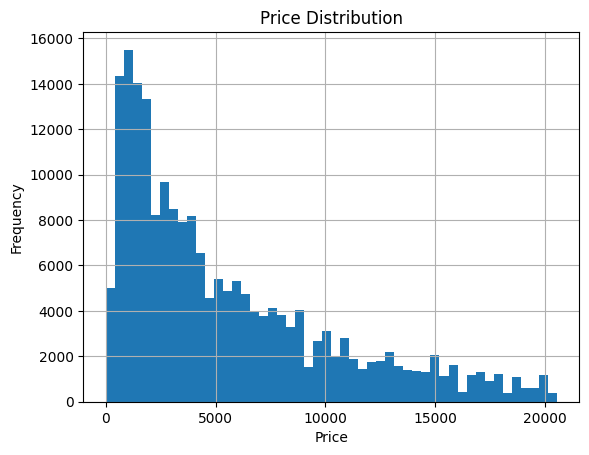

In [93]:
import matplotlib.pyplot as plt
df['price'].hist(bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


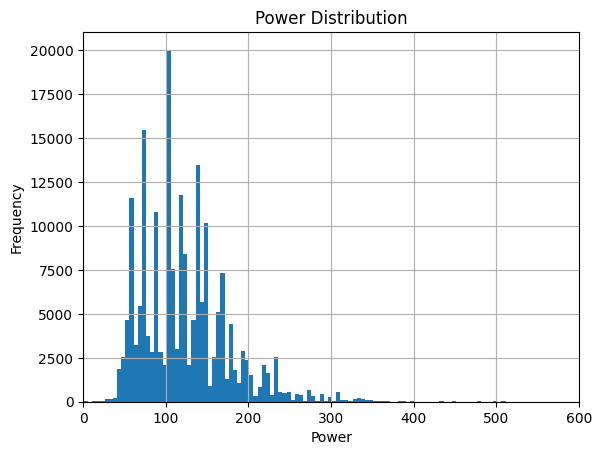

In [94]:
df['powerPS'].hist(bins = 4000)
plt.title('Power Distribution')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.xlim(0, 600)
plt.show()

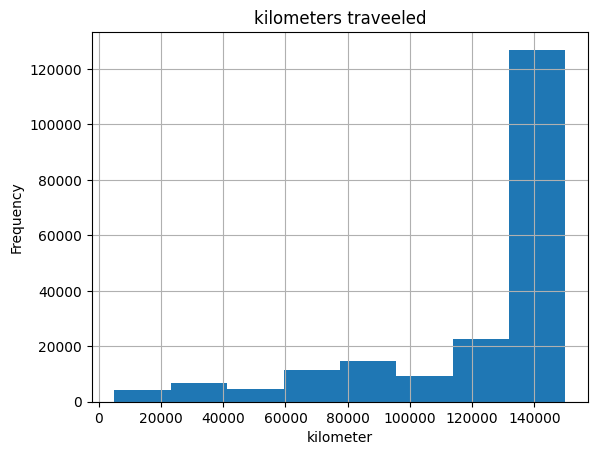

In [95]:
df['kilometer'].hist(bins = 8)
plt.title('kilometers traveeled')
plt.xlabel('kilometer')
plt.ylabel('Frequency')
plt.show()

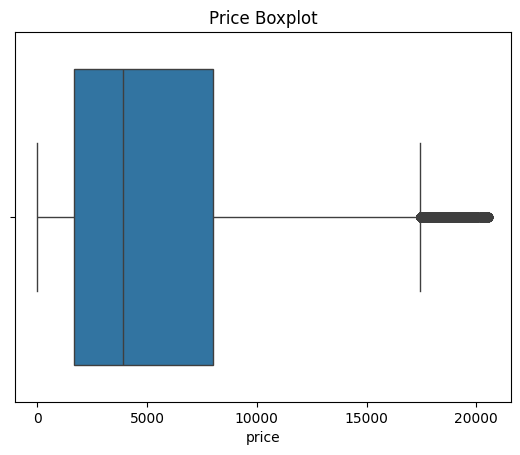

In [96]:
import seaborn as sns

sns.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.show()


/var/folders/5s/_vf4vsjd37s908q2cztz0nbh0000gn/T/ipykernel_70214/338428099.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['kilometer'], shade=True)


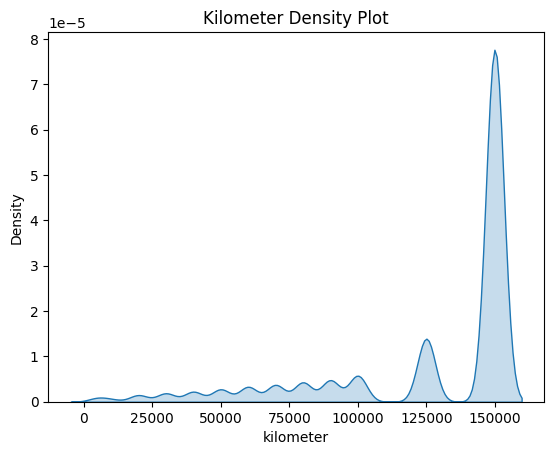

In [97]:
sns.kdeplot(df['kilometer'], shade=True)
plt.title('Kilometer Density Plot')
plt.show()


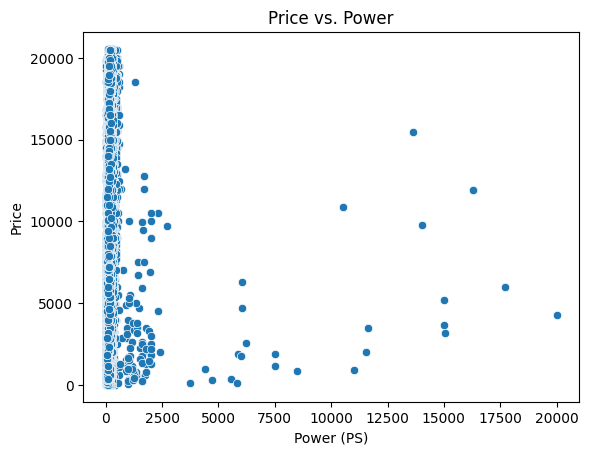

In [98]:
#scatter plots to compare various parameter
sns.scatterplot(x=df['powerPS'], y=df['price'])
plt.title('Price vs. Power')
plt.xlabel('Power (PS)')
plt.ylabel('Price')
plt.show()


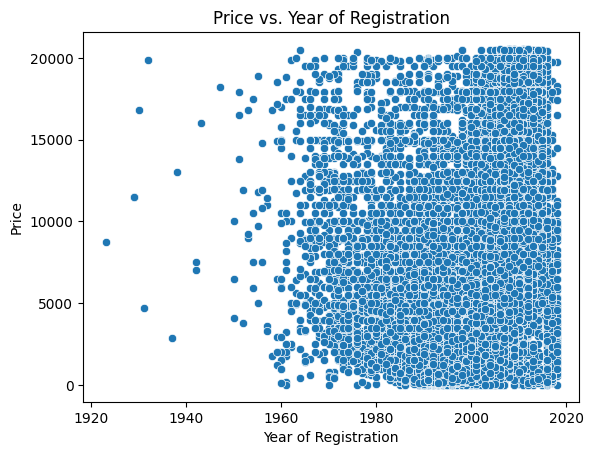

In [99]:
#price vs regYear
sns.scatterplot(x=df['yearOfRegistration'], y=df['price'])
plt.title('Price vs. Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.show()


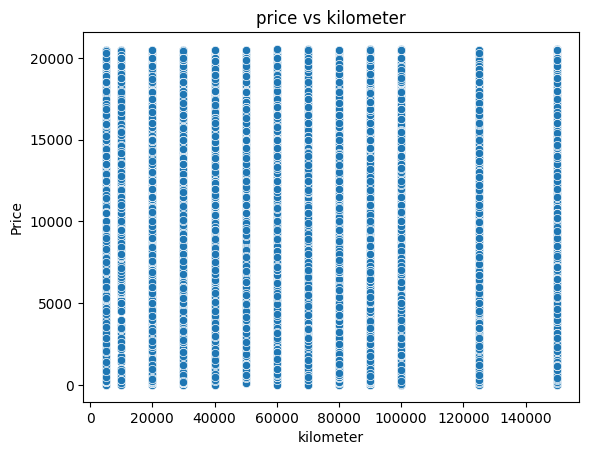

In [100]:
#price vs kilometer
sns.scatterplot(x=df['kilometer'], y = df['price'])
plt.title("price vs kilometer")
plt.xlabel('kilometer')
plt.ylabel('Price')
plt.show()

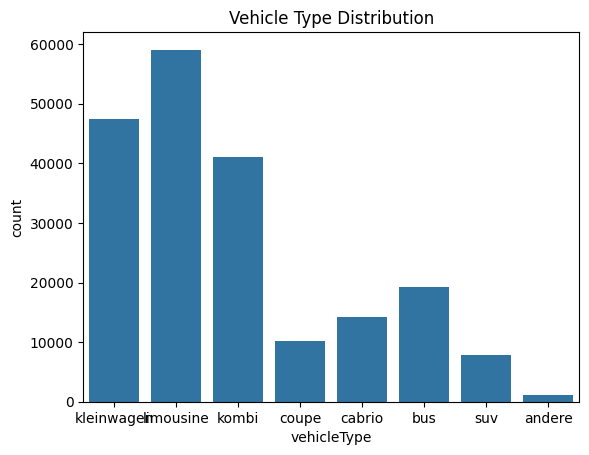

In [101]:
#number of vehicles of each type
sns.countplot(x=df['vehicleType'])
plt.title('Vehicle Type Distribution')
plt.show()


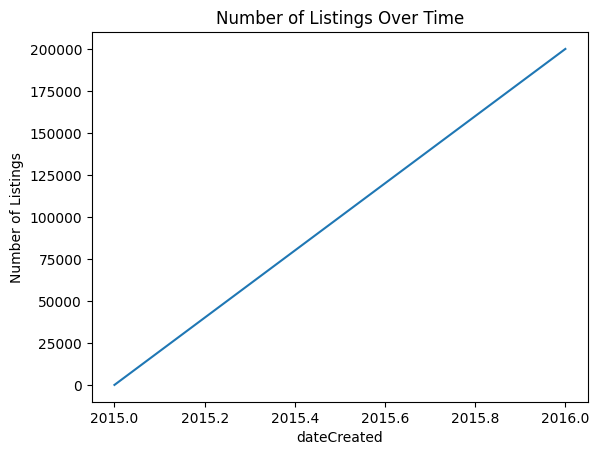

In [102]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['dateCreated'].groupby(df['dateCreated'].dt.year).count().plot()
plt.title('Number of Listings Over Time')
plt.ylabel('Number of Listings')
plt.show()



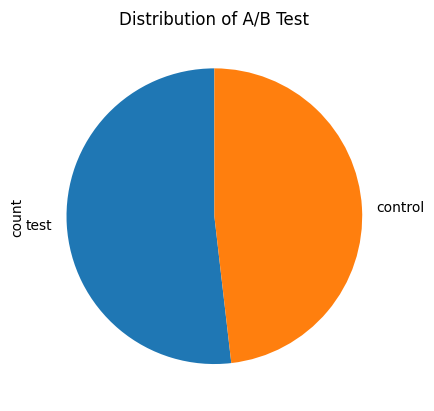

In [103]:
df['abtest'].value_counts().plot.pie(startangle=90)
plt.title('Distribution of A/B Test')
plt.show()


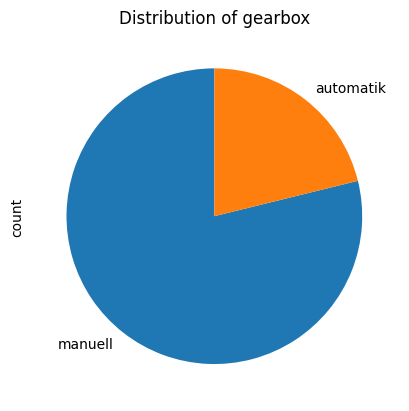

In [104]:
df['gearbox'].value_counts().plot.pie(startangle=90)
plt.title('Distribution of gearbox')
plt.show()

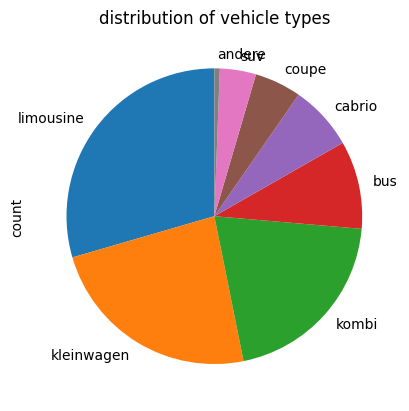

In [105]:
df['vehicleType'].value_counts().plot.pie(startangle = 90)
plt.title("distribution of vehicle types")
plt.show()

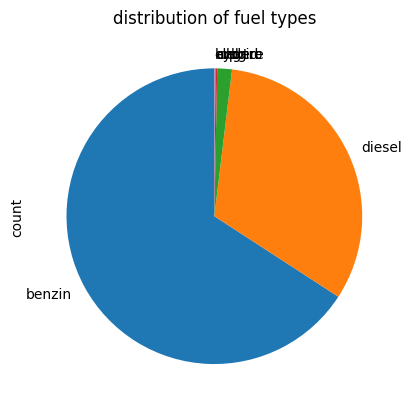

In [106]:
df['fuelType'].value_counts().plot.pie(startangle = 90)
plt.title("distribution of fuel types")
plt.show()

In [107]:
# Export to an Excel file
df.to_excel('output_file.xlsx', index=False)
